<a href="https://colab.research.google.com/github/souvik25162/ArimaAnnHybrid/blob/master/ARIMA_LSTM%20japan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels --upgrade

In [ ]:
pip install pymc3 --upgrade

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler,StandardScaler
plt.style.use('fivethirtyeight')

In [4]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('japan.csv')
#df.rename(columns={'LRHUTTTTSEM156S':'values'},inplace=True)
df.head()

Saving japan.csv to japan.csv


,days,japan
0,1,2.0
1,2,1.9
2,3,2.0
3,4,2.0
4,5,2.0


In [5]:
df.rename(columns={'japan':'values'},inplace=True)

Text(0.5, 0, 'day')

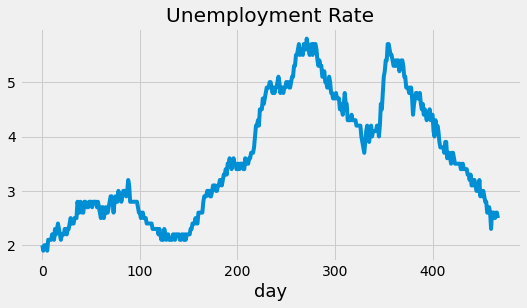

In [6]:
plt.figure(figsize=(8,4))
plt.title("Unemployment Rate")
plt.plot(df['values'])
plt.xlabel('day',fontsize=18)

In [7]:
data=df.filter(['values'])

In [10]:
len(df)

468

In [8]:
dataset=data.values

In [11]:
import math
training_datalen=432
print(training_datalen)

432


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [60]:
train_data= scaled_data[0:432,:]
time_step=15
test_data= scaled_data[training_datalen-time_step:,:]

In [61]:
len(test_data)

51

In [62]:
x_train=[]
y_train=[]
for i in range(time_step,len(train_data)):
  x_train.append(train_data[i-time_step:i,0])
  y_train.append(train_data[i,0])
  if i<=time_step:
    print(x_train)
    print(y_train)
    print()

[array([0.02564103, 0.        , 0.02564103, 0.02564103, 0.02564103,
       0.        , 0.05128205, 0.05128205, 0.05128205, 0.05128205,
       0.07692308, 0.07692308, 0.05128205, 0.1025641 , 0.07692308])]
[0.10256410256410253]



In [63]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [64]:
x_train.shape

(417, 15)

In [65]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [66]:
x_train.shape

(417, 15, 1)

In [67]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [68]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [69]:
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
417/417 [==============================] - 3s 7ms/step - loss: 0.0073
Epoch 2/10
417/417 [==============================] - 3s 6ms/step - loss: 0.0042
Epoch 3/10
417/417 [==============================] - 3s 7ms/step - loss: 0.0026
Epoch 4/10
417/417 [==============================] - 3s 7ms/step - loss: 0.0025
Epoch 5/10
417/417 [==============================] - 3s 7ms/step - loss: 0.0019
Epoch 6/10
417/417 [==============================] - 3s 7ms/step - loss: 0.0017
Epoch 7/10
417/417 [==============================] - 3s 7ms/step - loss: 0.0017
Epoch 8/10
417/417 [==============================] - 3s 7ms/step - loss: 0.0018
Epoch 9/10
417/417 [==============================] - 3s 7ms/step - loss: 0.0014
Epoch 10/10
417/417 [==============================] - 3s 6ms/step - loss: 0.0015


In [70]:
x_test=[]
y_test= dataset[training_datalen:,:]
for i in range(time_step,len(test_data)):
  x_test.append(test_data[i-time_step:i,0])

In [71]:
x_test=np.array(x_test)

In [72]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [73]:
pred= model.predict(x_test)
pred1=scaler.inverse_transform(pred)

In [31]:
len(pred1)

36

In [74]:
train= data[:training_datalen]
valid=data[training_datalen:]
valid['pred1']=pred1

No handles with labels found to put in legend.


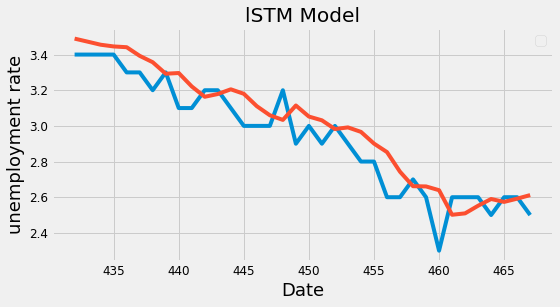

In [75]:
plt.figure(figsize=(8,4))
plt.title("lSTM Model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("unemployment rate",fontsize=18)
plt.plot(valid[['values','pred1']])
plt.legend()
plt.show()

#ARIMA

In [34]:
ts=df['values']
train=ts[0:432]
test= ts[432:len(ts)]

In [35]:
len(test)

36

In [36]:
train=train.values
test=test.values

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


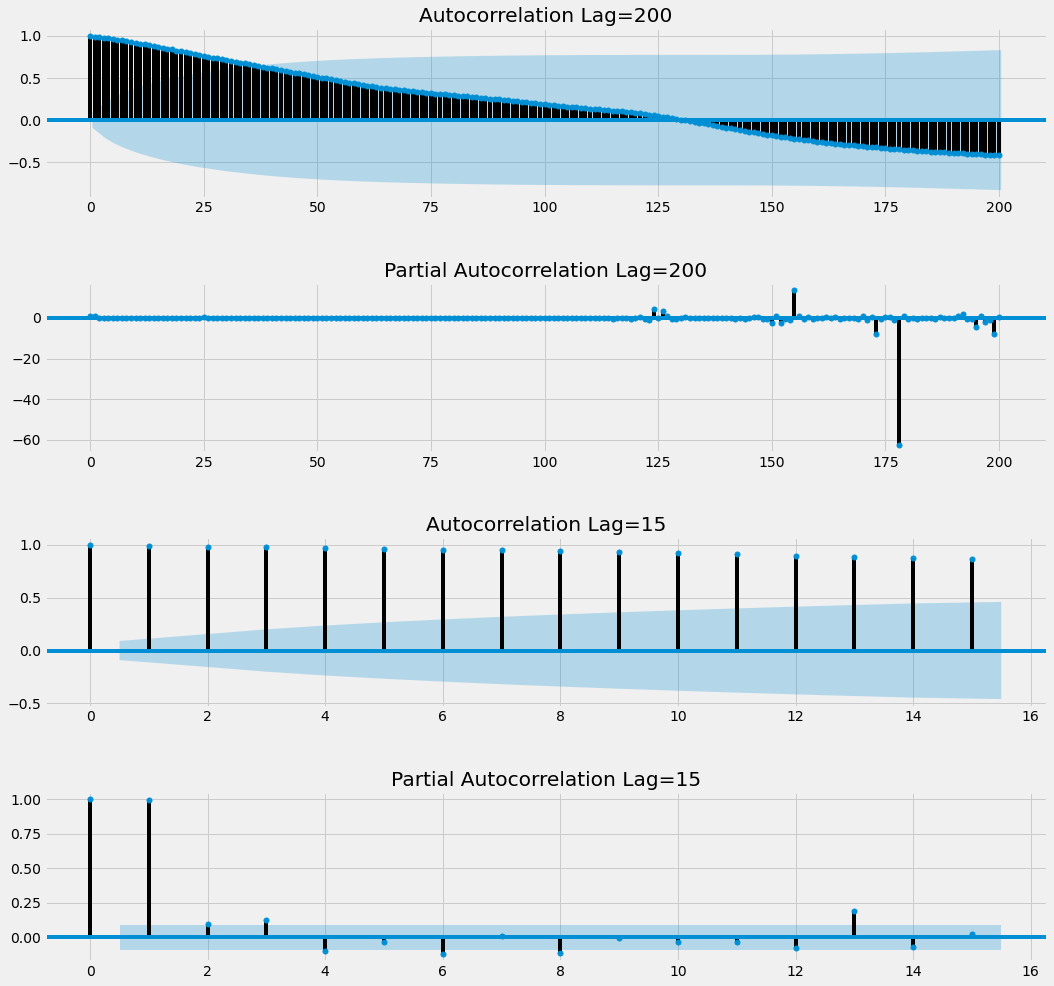

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(411)
fig = plot_acf(df['values'],lags=200,ax=ax1)
plt.title('Autocorrelation Lag=200')
ax2 = fig.add_subplot(412)
fig = plot_pacf(df['values'],lags=200,ax=ax2)
plt.title('Partial Autocorrelation Lag=200')
ax3 = fig.add_subplot(413)
fig = plot_acf(df['values'],lags=15,ax=ax3)
plt.title('Autocorrelation Lag=15')
ax4 = fig.add_subplot(414)
fig = plot_pacf(df['values'],lags=15,ax=ax4)
plt.title('Partial Autocorrelation Lag=15')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.5)
plt.show()

In [38]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

def test_stationarity(series,mlag =None, lag = None,):
    print('ADF Test Result')
    res = adfuller(series, maxlag = mlag, autolag = lag)
    output = pd.Series(res[0:4],index = ['Test Statistic', 'p value', 'used lag', 'Number of observations used'])
    for key, value in res[4].items():
        output['Critical Value ' + key] = value
    print(output)

In [39]:
test_stationarity(df['values'])

ADF Test Result
Test Statistic                  -1.863261
p value                          0.349537
used lag                        18.000000
Number of observations used    449.000000
Critical Value 1%               -3.444998
Critical Value 5%               -2.867999
Critical Value 10%              -2.570210
dtype: float64


In [40]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [42]:
history=[x for x in train]
predictions=list()

for t in range(len(test)):
  model=ARIMA(history,order=(4,1,2))
  model_fit=model.fit(disp=0)
  output=model_fit.forecast()
  yhat=output[0]
  predictions.append(yhat)
  obs=test[t]
  history.append(obs)
  print('predicted=%f, expected=%f'%(yhat,obs))

predicted=3.469624, expected=3.400000
predicted=3.389733, expected=3.400000
predicted=3.416179, expected=3.400000
predicted=3.384804, expected=3.400000
predicted=3.398825, expected=3.300000
predicted=3.299776, expected=3.300000
predicted=3.316139, expected=3.200000
predicted=3.187391, expected=3.300000
predicted=3.303175, expected=3.100000
predicted=3.075879, expected=3.100000
predicted=3.142879, expected=3.200000
predicted=3.135115, expected=3.200000
predicted=3.193132, expected=3.100000
predicted=3.085394, expected=3.000000
predicted=3.040477, expected=3.000000
predicted=2.977605, expected=3.000000
predicted=2.995605, expected=3.200000
predicted=3.143080, expected=2.900000
predicted=2.908858, expected=3.000000
predicted=3.033632, expected=2.900000
predicted=2.864851, expected=3.000000
predicted=3.007061, expected=2.900000
predicted=2.863532, expected=2.800000
predicted=2.846448, expected=2.800000
predicted=2.772510, expected=2.600000
predicted=2.629242, expected=2.600000
predicted=2.

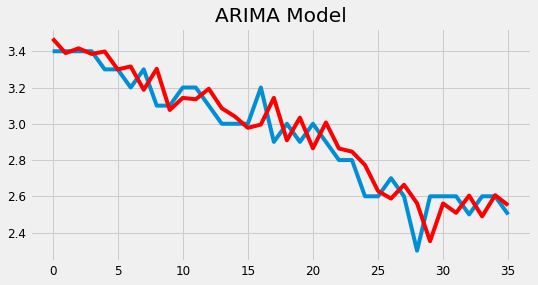

In [43]:
plt.figure(figsize=(8,4))
plt.title("ARIMA Model")
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

ERROR FOR ARIMA

In [44]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.013453356602012708
RMSE: 0.11598860548352458


FOR LSTM

In [76]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,pred1)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.015901821667230708
RMSE: 0.12610242530273044


#HYBRID # ARIMA-LSTM


In [77]:
NEW_PREDICTION= (pred1+predictions)/2

In [78]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,NEW_PREDICTION)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.013293591300305174
RMSE: 0.11529783736178738


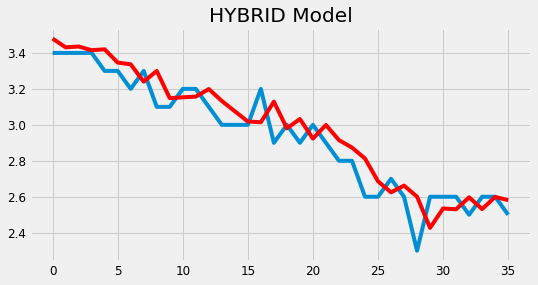

In [79]:
plt.figure(figsize=(8,4))
plt.title("HYBRID Model")
plt.plot(test)
plt.plot(NEW_PREDICTION, color='red')
plt.show()